#Web scrapping X Analysis

#Essential Importations

In [ ]:
#Essential libraries for data represetation
import pandas as pd

#Libraries for data scraping
import requests
from bs4 import BeautifulSoup

Data Scraping with Requests and BeautifulSoup


In [ ]:
base_url="http://books.toscrape.com"

requests.get(base_url).content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

In [ ]:
def get_books_mapping(content):
    books_dic = {"star" : [],
                 "title" : [],
                 "price" : [],
                 "url" : []
    }
    
    soup = BeautifulSoup(content, "html.parser")

    #print(soup.find_all(class_ = "product_pod"))
    
    for p in soup.find_all(class_ = "product_pod"):
        books_dic["url"].append(base_url+"/catalogue/"+p.find("a")["href"])
        books_dic["title"].append(p.find("img")["alt"])
        books_dic["price"].append(float(p.find(class_ = "price_color").contents[0][1:]))
        
        star_string = (p.find(class_ = "star-rating")["class"][1])
        
        books_dic["star"].append(1 if star_string == "One"
                                else 2 if star_string == "Two"
                                else 3 if star_string == "Three"
                                else 4 if star_string == "Four"
                                else 5)
       
    return books_dic

get_books_mapping(requests.get("http://books.toscrape.com/catalogue/page-1.html").content)

{'price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  37.59,
  51.33,
  45.17],
 'star': [3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2],
 'title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Scie

In [ ]:
all_books = pd.DataFrame.from_dict(get_books_mapping(requests.get("http://books.toscrape.com/catalogue/page-1.html").content))

for i in range(2,51):
    temp = pd.DataFrame.from_dict(get_books_mapping(requests.get("http://books.toscrape.com/catalogue/page-"+str(i)+".html").content))
    all_books = all_books.append(temp)
all_books                                  
                                   

,star,title,price,url
0,3,A Light in the Attic,51.77,http://books.toscrape.com/catalogue/a-light-in...
1,1,Tipping the Velvet,53.74,http://books.toscrape.com/catalogue/tipping-th...
2,1,Soumission,50.10,http://books.toscrape.com/catalogue/soumission...
3,4,Sharp Objects,47.82,http://books.toscrape.com/catalogue/sharp-obje...
4,5,Sapiens: A Brief History of Humankind,54.23,http://books.toscrape.com/catalogue/sapiens-a-...
...,...,...,...,...
15,1,Alice in Wonderland (Alice's Adventures in Won...,55.53,http://books.toscrape.com/catalogue/alice-in-w...
16,4,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,http://books.toscrape.com/catalogue/ajin-demi-...
17,5,A Spy's Devotion (The Regency Spies of London #1),16.97,http://books.toscrape.com/catalogue/a-spys-dev...
18,1,1st to Die (Women's Murder Club #1),53.98,http://books.toscrape.com/catalogue/1st-to-die...


Add and fill a column `genre` (Historial Fiction, etc.) to the `all_books` Pandas dataframe.

In [ ]:
def get_genre(url):
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    return soup.find(class_ = "breadcrumb").contents[5].find("a").contents[0]

all_books["genre"] = all_books["url"].map(get_genre)

all_books

,star,title,price,url,genre
0,3,A Light in the Attic,51.77,http://books.toscrape.com/catalogue/a-light-in...,Poetry
1,1,Tipping the Velvet,53.74,http://books.toscrape.com/catalogue/tipping-th...,Historical Fiction
2,1,Soumission,50.10,http://books.toscrape.com/catalogue/soumission...,Fiction
3,4,Sharp Objects,47.82,http://books.toscrape.com/catalogue/sharp-obje...,Mystery
4,5,Sapiens: A Brief History of Humankind,54.23,http://books.toscrape.com/catalogue/sapiens-a-...,History
...,...,...,...,...,...
15,1,Alice in Wonderland (Alice's Adventures in Won...,55.53,http://books.toscrape.com/catalogue/alice-in-w...,Classics
16,4,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,http://books.toscrape.com/catalogue/ajin-demi-...,Sequential Art
17,5,A Spy's Devotion (The Regency Spies of London #1),16.97,http://books.toscrape.com/catalogue/a-spys-dev...,Historical Fiction
18,1,1st to Die (Women's Murder Club #1),53.98,http://books.toscrape.com/catalogue/1st-to-die...,Mystery


## Exploratory Data Analysis of the Scrapped Data

In [ ]:
all_books["genre"].unique()

array(['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History',
       'Young Adult', 'Business', 'Default', 'Sequential Art', 'Music',
       'Science Fiction', 'Politics', 'Travel', 'Thriller',
       'Food and Drink', 'Romance', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Fantasy', 'Add a comment', 'Science', 'Health', 'Horror',
       'Self Help', 'Religion', 'Christian', 'Crime', 'Autobiography',
       'Christian Fiction', 'Biography', 'Womens Fiction', 'Erotica',
       'Cultural', 'Psychology', 'Humor', 'Historical', 'Novels',
       'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Sports and Games', 'Adult Fiction', 'Parenting', 'Paranormal'],
      dtype=object)

Replacing the books with the genre “Add a comment” and “Default” in the all_books dataframe with the genre “Unknown”.

In [ ]:
all_books["genre"].replace({
    "Default" : "Unknown",
    "Add a comment" : "Unknown"
})

0                 Poetry
1     Historical Fiction
2                Fiction
3                Mystery
4                History
             ...        
15              Classics
16        Sequential Art
17    Historical Fiction
18               Mystery
19                Travel
Name: genre, Length: 1000, dtype: object

Computing the median price of a book per genre (using groupby) and sort the genres from the cheapest to the most expensive (using sort_values). Using a bar plot to show the median price for each genre where the x-axis will be the genre names and the y-label will be the price.

In [ ]:
all_books[["genre", "price"]].groupby(["genre"]).median().sort_values(by=["price"])

,price
genre,
Crime,10.970
Academic,13.120
Adult Fiction,15.360
Paranormal,15.400
Erotica,19.190
Historical,22.830
Mystery,25.385
Religion,28.420
Childrens,28.540


Bar plot to show the number of books per genre and a scatter plot where the x-axis is the price, the y-axis is the genre and the size of the points are defined by the number of stars.

<AxesSubplot:title={'center':'Number of books per genre'}>

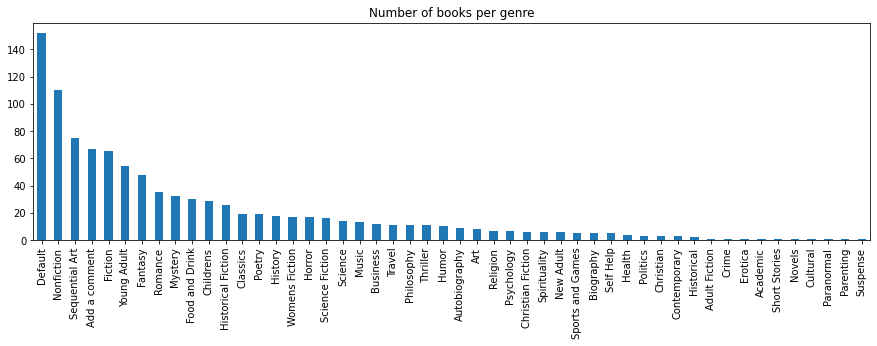

In [ ]:
all_books["genre"].value_counts().plot(kind="bar", title="Number of books per genre", figsize=(15,4))
